# **2021025081 DESQUITADO, YUICHI**
# **APM1111 Statistical Theory Formative Assessment 6**



In [28]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Invisibility Cloak.csv")
dataset

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


# **Assumption 0: Setting Hypothesis and Alpha**

$H_0$ = *The two unrelated group are equal, $\mu_1 = \mu_2$.*

$H_A$ = *The two unrelated group are not equal, $\mu_1 \neq \mu_2$.*

As significance level is not dictated, we will be using $\alpha = 0.05$.

# **Assumption 1: Scale of Measurement**

Obserrving the dataset, the scale of measurement used on "Mischief" is continuous.

# **Assumption 2: Categorical Groups**

The said test have two groups under "Cloak", 0 for those no possession the cloak, while 1 for those given cloaks.

# **Assumption 3: Simple Random Sampling**

The dataset includes 24 participants, 12 for each group and these are distinct people, so no person is involved in more than one group.

# **Assumption 4: Outliers**

For this assumption, we will be using a boxplot to identify potential outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

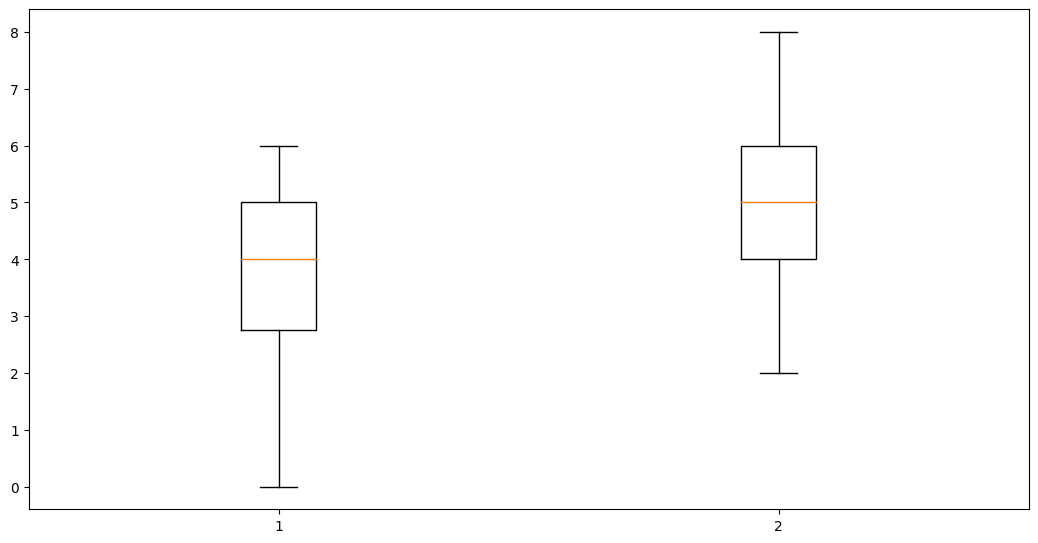

In [24]:
group0 = dataset[dataset['Cloak'] == 0]['Mischief']
group1 = dataset[dataset['Cloak'] == 1]['Mischief']

outlierData = [group0, group1]

fig = plt.figure(figsize = (10, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(outlierData)
plt.show

According to the boxplot, no outlier is identified. No editing must be made.

# **Assumption 5: Normality**

For the normality, a Shapiro-Wilk Test will be used.

In [25]:
g0shapiro, g0shapiroP = stats.shapiro(group0)
g1shapiro, g1shapiroP = stats.shapiro(group1)

print("The Shapiro-Wilk Test P-Value for Group 0 is =", g0shapiroP, ", while for Group 1 is =", g1shapiroP,".")

The Shapiro-Wilk Test P-Value for Group 0 is = 0.23144638538360596 , while for Group 1 is = 0.9361882209777832 .


Being significantly higher than the $\alpha$ = 0.05 (Group 0 = 0.231, Group 1 = 0.936), we fail to reject the null hypothesis, meaning we have insufficient proof that the said data does not come from a normal distribution.

# **Assumption 6: Homogeneity of Variance**

We will be using a Levene's test for this assumption.

In [26]:
homoVarStats, homoVarP = stats.levene(dataset[dataset['Cloak'] == 0]['Mischief'], dataset[dataset['Cloak'] == 1]['Mischief'])

print("The P-Value of the Levene test is =", homoVarP)

The P-Value of the Levene test is = 0.6086825890641905


Having be higher than the $\alpha = 0.05$, the said groups are not homogeneous with each other in variance.

# **Post-Assumption: T-Test**

After the five assumptions, we now perform independent T-Test to indicate the significance of the two groups and two confirm nor reject the null hypothesis.

In [27]:
tTestStats, tTestP = stats.ttest_ind(dataset[dataset['Cloak'] == 0]['Mischief'], dataset[dataset['Cloak'] == 1]['Mischief'])
print("The P Value of the Independent T Test is =", tTestP)

a = 0.05

if tTestP > a:
  print("The P Value is higher than the Alpha = 0.05, therefore reject the null hypothesis.")
  print("Alternate hypothesis: The two unrelated group are not equal, therefore unsignificantly related to each other.")
else:
  print("The P Value is less than or equal to the Alpha = 0.05, therefore confirm the null hypothesis.")
  print("Null hypothesis: The two unrelated group are equal, therefore significant to each other.")

The P Value of the Independent T Test is = 0.10068634487481125
The P Value is higher than the Alpha = 0.05, therefore reject the null hypothesis.
Alternate hypothesis: The two unrelated group are not equal, therefore unsignificantly related to each other.


# **Presenting the Results**

In a hypothetical world where Invisibility Cloaks exists, a group of psychologists mounted hidden cameras and tested 24 individuals in a closed community, half in possession of cloaks (cloaks = 1), while the other half are not (cloak = 0). They were sworn to secrecy of not revealing the existence of such cloaks. Within a span of week, they were monitored to count mischievous acts done by these selected individuals.

The findings shows that those with cloaks are far more frequent to do mischievous acts than those without the cloaks, yet they are not significantly related to one another as distinct groups due to having a higher P value than the significance value Alpha (T Test P Values = 0.10 vs. Alpha = 0.05).